# Mini-projet - Elections
*Basé sur Hands-on Data Preprocessing, R. Jafari, 2022*

**Ce TP est noté. Merci de lire attentivement le fichier instructions.pdf avant de commencer**

Nom étudiant 1: **Gombas**

Prénom étudiant 1: **Owen**

Nom étudiant 2: **Darmanger**

Prénom étudiant 2: **David**

## Préambule

### Imports

In [71]:
# packages standards
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from typing import List, Dict, Tuple, Callable, Any
import re

In [72]:
# packages spécifiques
import matplotlib.image as mpimg
import seaborn as sns

### Data

In [73]:
DATA_FOLDER = os.path.join(".", "data")  # chemin relatif et nom du dossier "data"

RAW_FOLDER = os.path.join(
    DATA_FOLDER, "raw"
)  # chemin du dossier raw (ne devrait pas être changé): INPUT

PREPROCESSED_FOLDER = os.path.join(
    DATA_FOLDER, "preprocessed"
)  # chemin du dossier preprocessed (resultat du traitement raw): OUTPUT

MEDIA_FOLDER = os.path.join(
    DATA_FOLDER, "media"
)  # chemin du dossier media pour les illustrations de mise en page des notebooks

EXPLORATION_FOLDER = os.path.join(
    DATA_FOLDER, "exploration"
)  # chemin du dossier exploration pour les notebooks dexploration

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
from pandas_profiling import ProfileReport

In [75]:
# dictionnary with filename and header row
files = glob.glob(os.path.join(PREPROCESSED_FOLDER, "*.csv"))
files

['./data/preprocessed/Education.csv',
 './data/preprocessed/PopulationEstimates.csv',
 './data/preprocessed/countypres_2000-2020.csv',
 './data/preprocessed/PovertyEstimates.csv',
 './data/preprocessed/Unemployment.csv']

In [76]:
def read_csv(filename: str) -> pd.DataFrame:
    return pd.read_csv(filename, dtype={"fips": str})

In [77]:
def numeric_df(df: pd.DataFrame) -> pd.DataFrame:
    return df.select_dtypes(include=np.number)

In [78]:
def show_na(df: pd.DataFrame):
    nulls = df.isnull().sum()[df.isnull().sum() > 0].to_dict()
    
    if len(nulls) == 0:
        print("No null values")
        return 0

    for key, value in nulls.items():
        print(f"{key}: {value}")
    
    # show rows with null values
    nulls_df = df[df.isnull().any(axis=1)]

    # print rows of nulls_df
    for i in range(len(nulls_df)):
        r = ""
        for key, value in nulls_df.iloc[i].to_dict().items():
            r += f"{key}: {value} | "
        print(r)

    fig = plt.figure(figsize=(30, 10))
    df.isnull().sum().plot(kind="bar")

    return len(nulls_df)

In [79]:
votes = read_csv(files[2])
datas_dfs = [read_csv(file) for file in files[:2] + files[3:]]

# Merge everything into one dataset

In [80]:
def merge_dfs_on_fips(dfs: List[pd.DataFrame]):
    df = dfs[0]
    for d in dfs[1:]:
        df = pd.merge(df, d, on="fips", how="outer", suffixes=("", "_y"))
    return df

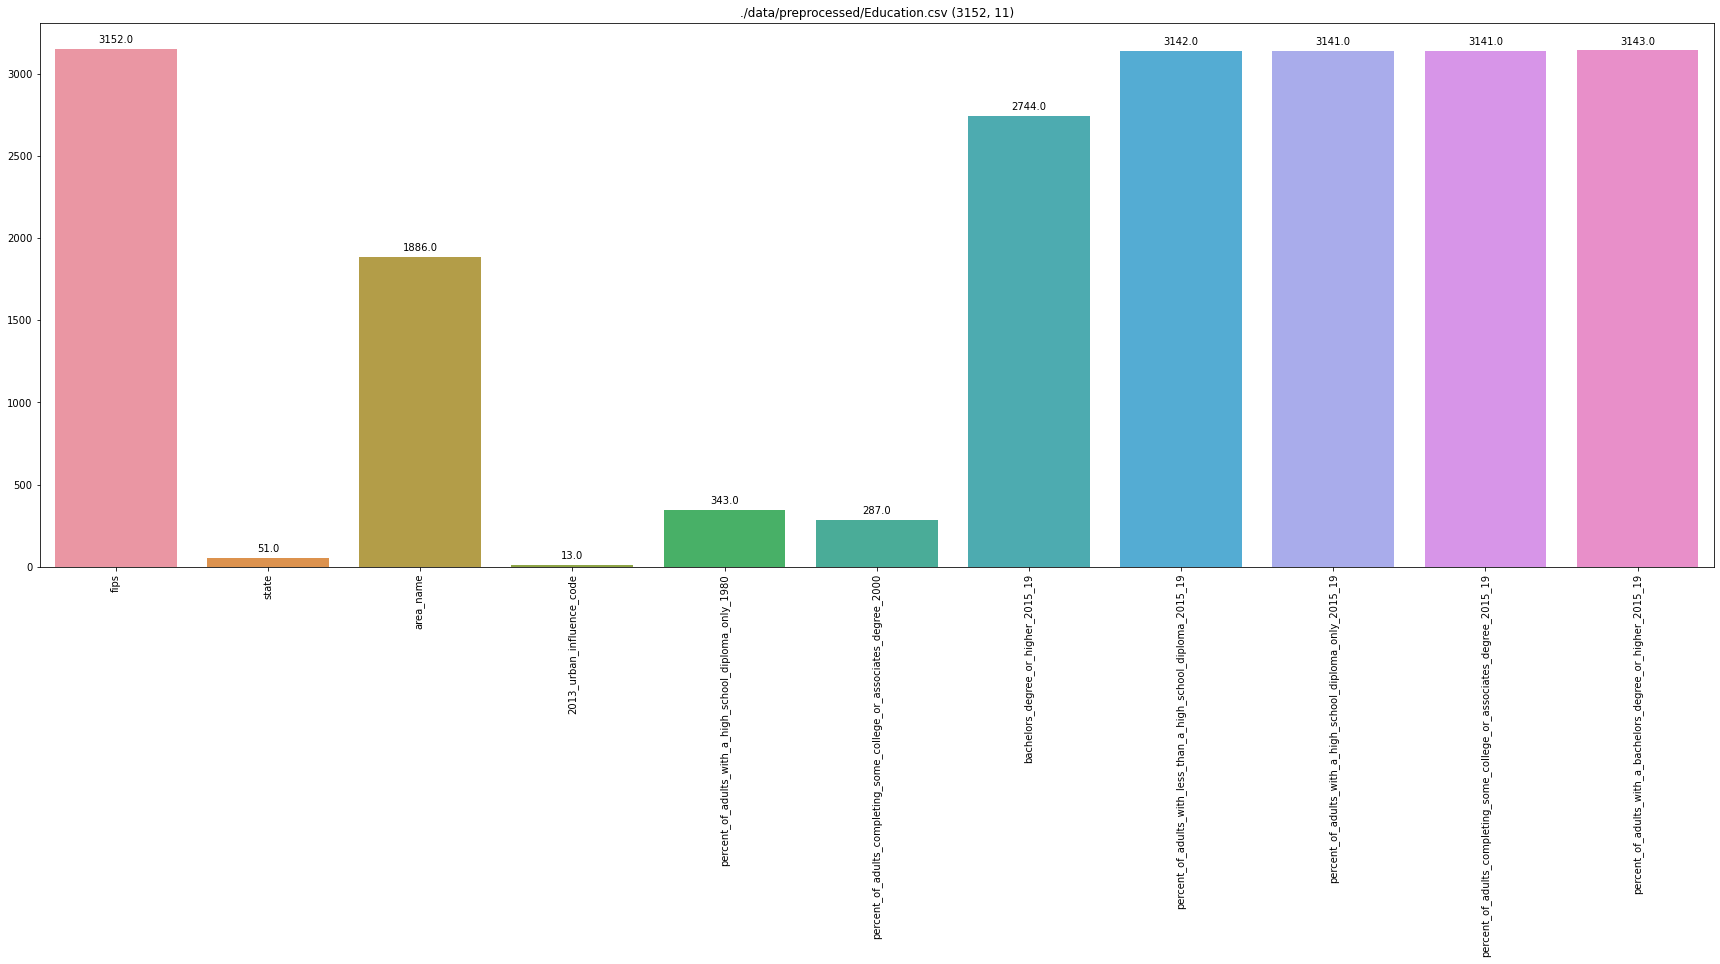

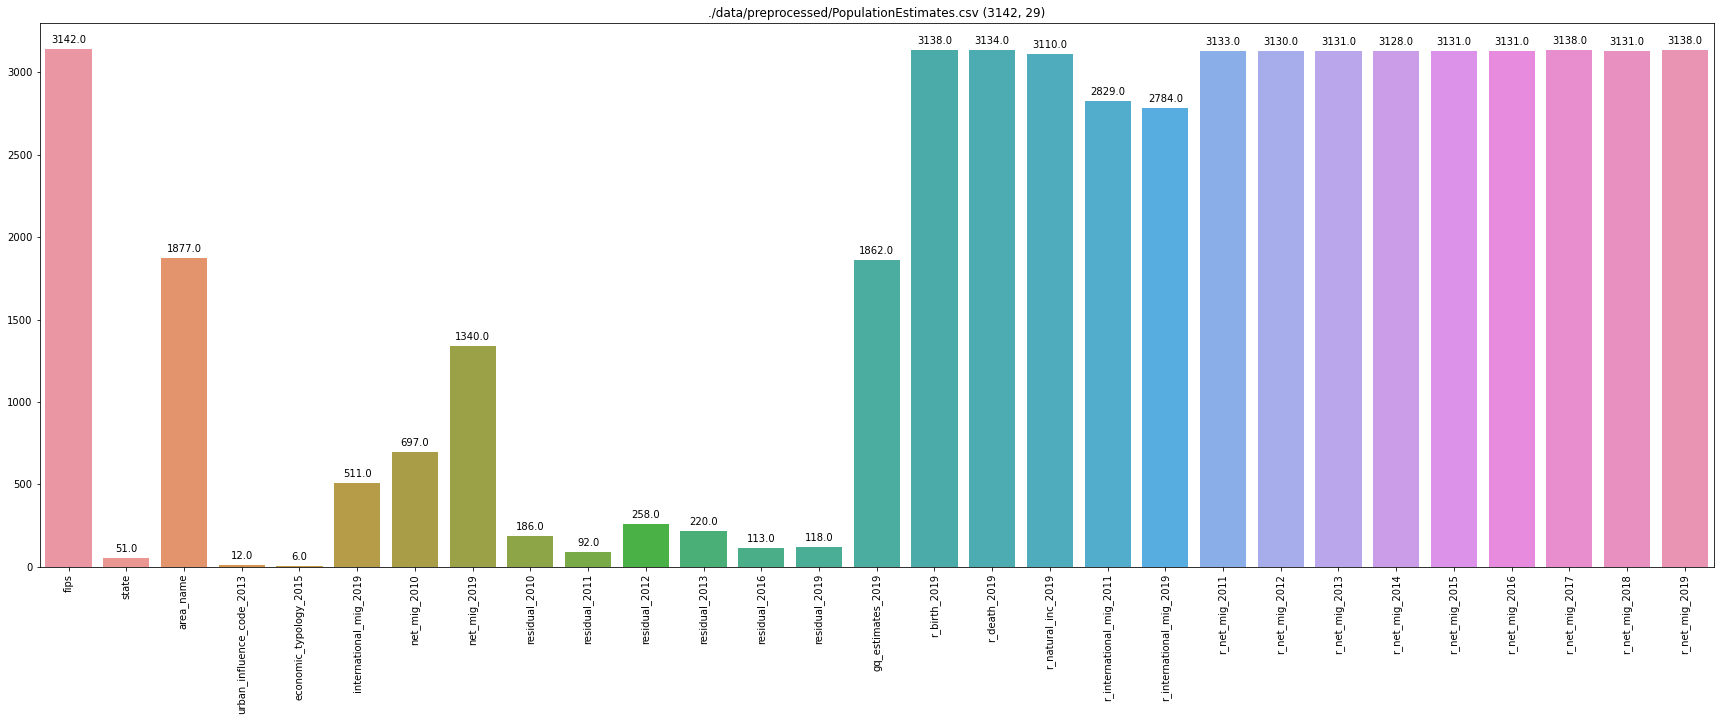

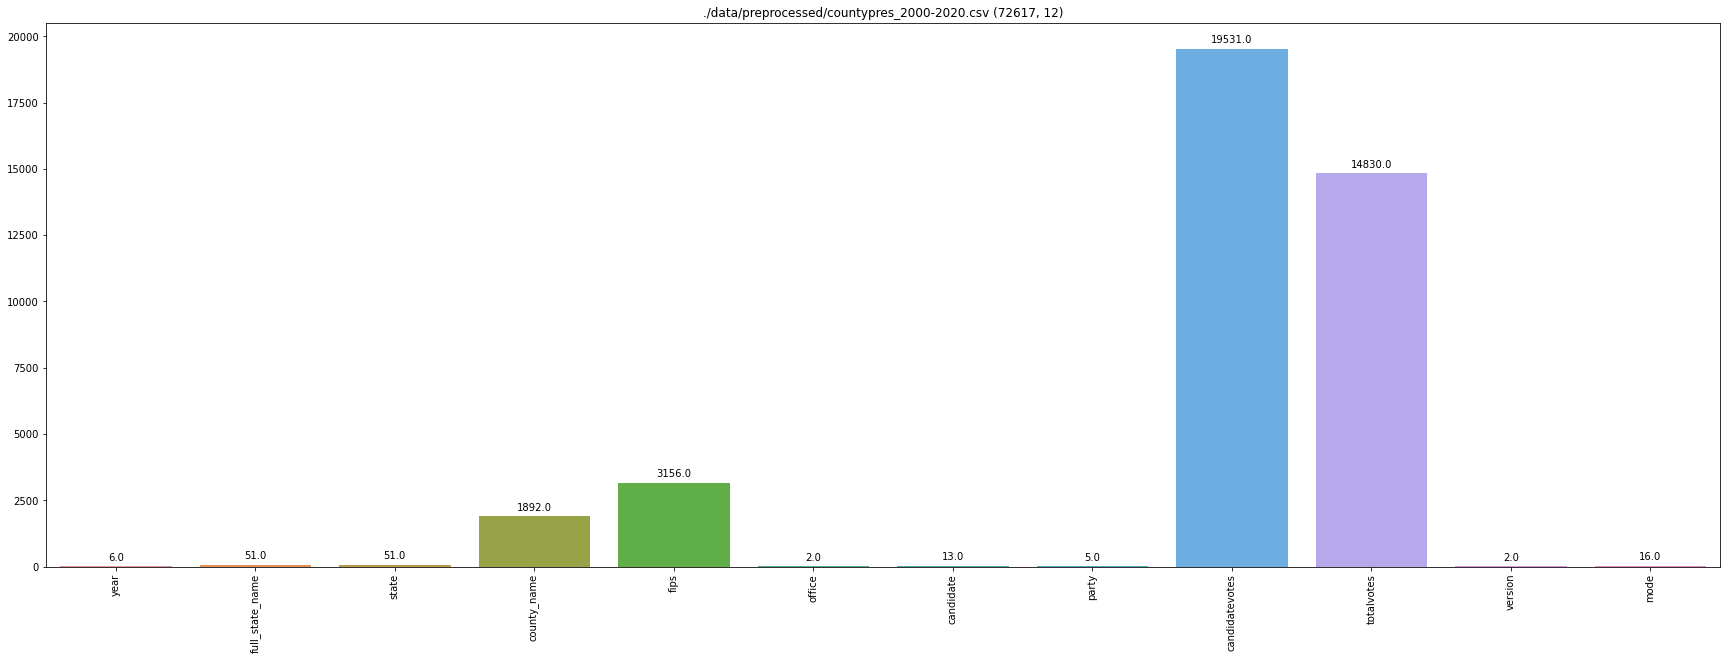

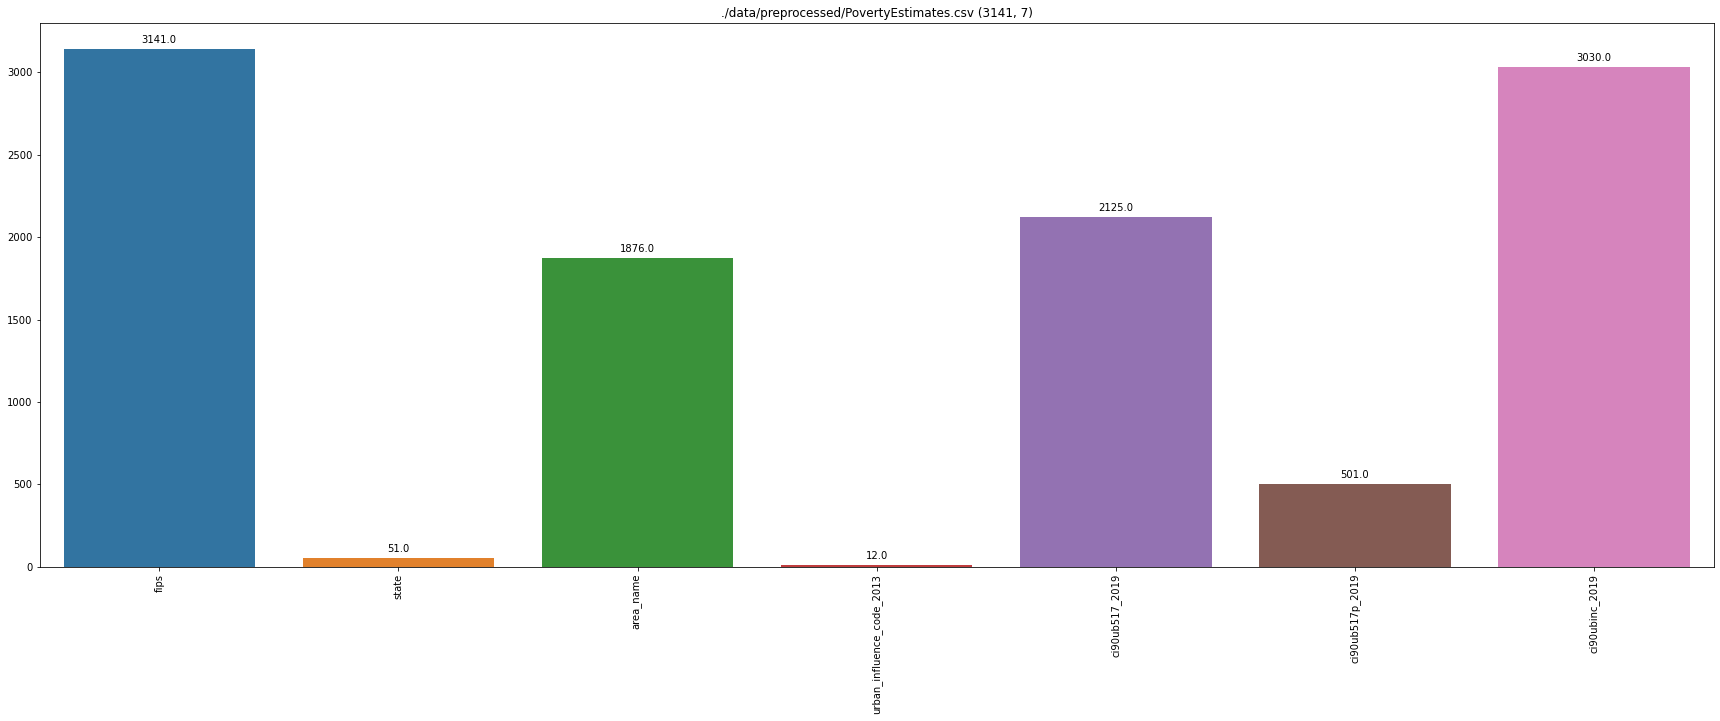

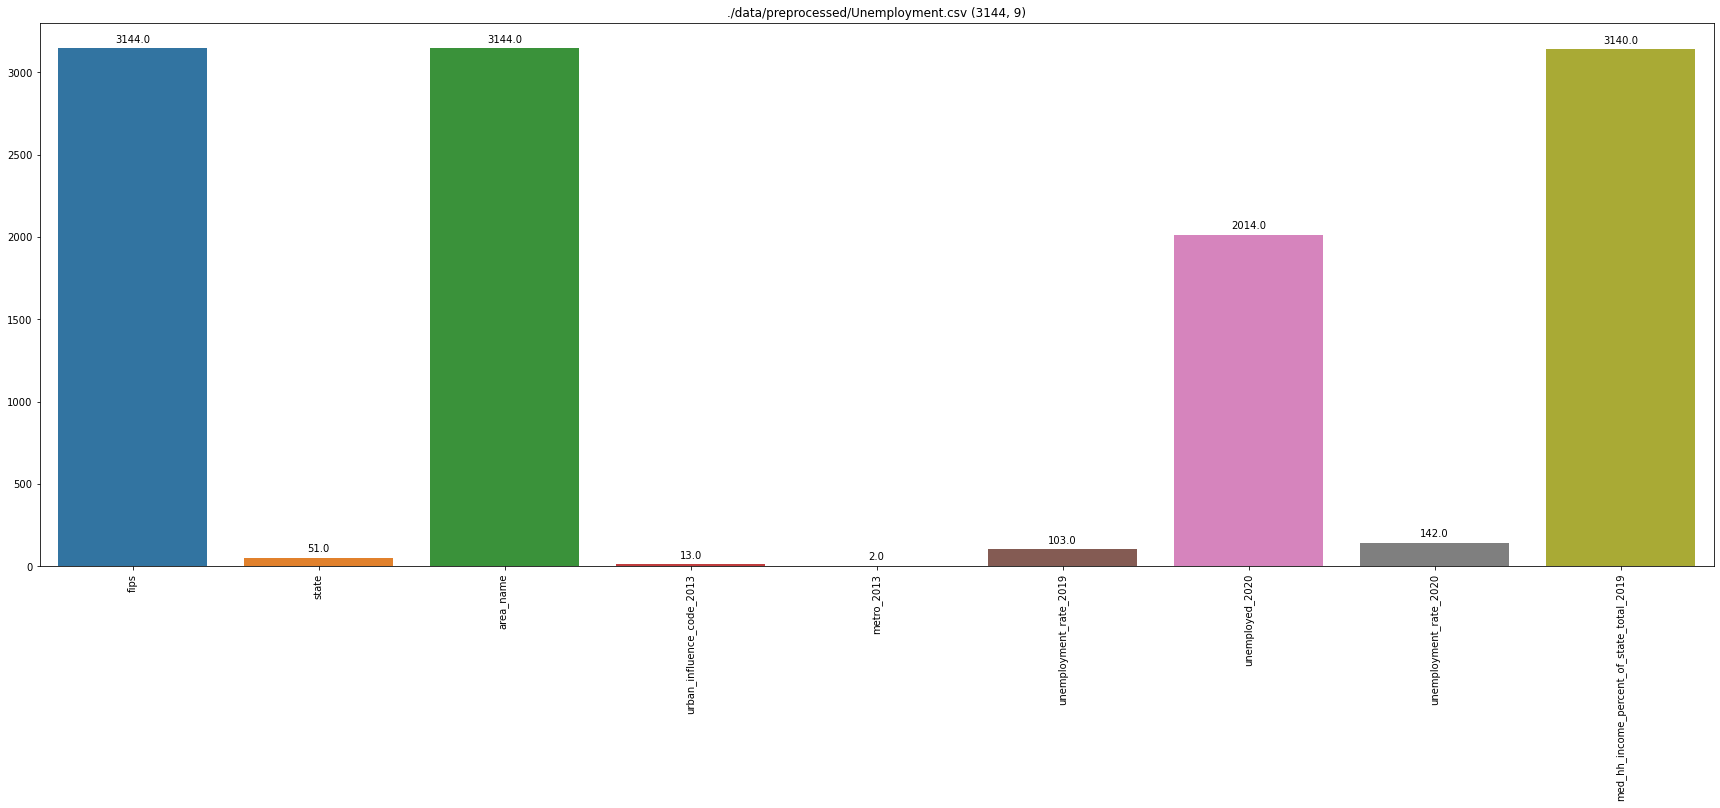

In [81]:
for file in files:
    df = read_csv(file)
    fig = plt.figure(figsize=(30, 10))
    plt.title(f"{file} {df.shape}")

    # Source https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
    splot = sns.barplot(x=df.columns, y=df.nunique())
    for p in splot.patches:
        splot.annotate(
            p.get_height(), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha="center",
            va="center", 
            xytext = (0, 9), 
            textcoords = "offset points"
        )

    plt.xticks(rotation=90)
    plt.show()

In [82]:
df = merge_dfs_on_fips(datas_dfs)
df

,fips,state,area_name,2013_urban_influence_code,percent_of_adults_with_a_high_school_diploma_only_1980,percent_of_adults_completing_some_college_or_associates_degree_2000,bachelors_degree_or_higher_2015_19,percent_of_adults_with_less_than_a_high_school_diploma_2015_19,percent_of_adults_with_a_high_school_diploma_only_2015_19,percent_of_adults_completing_some_college_or_associates_degree_2015_19,...,ci90ub517p_2019,ci90ubinc_2019,state_y,area_name_y,urban_influence_code_2013_y,metro_2013,unemployment_rate_2019,unemployed_2020,unemployment_rate_2020,med_hh_income_percent_of_state_total_2019
0,01001,AL,Autauga County,2.0,35.2,26.9,9929.0,11.483395,33.588459,28.356571,...,19.4,63949.0,AL,"Autauga County, AL",2.0,1.0,2.7,1262.0,4.9,112.481888
1,01003,AL,Baldwin County,2.0,33.7,29.3,48148.0,9.193843,27.659616,31.284081,...,17.2,65149.0,AL,"Baldwin County, AL",2.0,1.0,2.8,5425.0,5.6,115.645828
2,01005,AL,Barbour County,6.0,26.1,21.3,2080.0,26.786907,35.604542,26.029837,...,49.0,40122.0,AL,"Barbour County, AL",6.0,0.0,3.8,605.0,7.0,69.482918
3,01007,AL,Bibb County,1.0,29.6,20.4,1678.0,20.942602,44.878773,23.800098,...,32.7,53545.0,AL,"Bibb County, AL",1.0,1.0,3.1,573.0,6.6,92.557610
4,01009,AL,Blount County,1.0,32.4,24.8,5210.0,19.509438,33.422131,33.975021,...,25.8,59027.0,AL,"Blount County, AL",1.0,1.0,2.7,1008.0,4.1,102.184624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,56037,WY,Sweetwater County,8.0,43.5,35.7,6291.0,7.213361,33.041271,37.246979,...,11.1,87841.0,WY,"Sweetwater County, WY",8.0,0.0,4.0,1532.0,7.4,121.899567
3148,56039,WY,Teton County,8.0,27.2,30.0,9875.0,4.814409,14.876176,23.304277,...,6.7,111143.0,WY,"Teton County, WY",8.0,0.0,2.8,912.0,6.0,149.408936
3149,56041,WY,Uinta County,8.0,46.8,34.2,2078.0,7.258562,41.522678,35.189754,...,11.1,78321.0,WY,"Uinta County, WY",8.0,0.0,4.0,582.0,6.3,106.959732
3150,56043,WY,Washakie County,11.0,43.2,33.1,1297.0,10.241615,29.751171,36.620987,...,17.4,60194.0,WY,"Washakie County, WY",11.0,0.0,4.1,211.0,5.3,83.326279


In [83]:
df.columns.to_list()

['fips',
 'state',
 'area_name',
 '2013_urban_influence_code',
 'percent_of_adults_with_a_high_school_diploma_only_1980',
 'percent_of_adults_completing_some_college_or_associates_degree_2000',
 'bachelors_degree_or_higher_2015_19',
 'percent_of_adults_with_less_than_a_high_school_diploma_2015_19',
 'percent_of_adults_with_a_high_school_diploma_only_2015_19',
 'percent_of_adults_completing_some_college_or_associates_degree_2015_19',
 'percent_of_adults_with_a_bachelors_degree_or_higher_2015_19',
 'state_y',
 'area_name_y',
 'urban_influence_code_2013',
 'economic_typology_2015',
 'international_mig_2019',
 'net_mig_2010',
 'net_mig_2019',
 'residual_2010',
 'residual_2011',
 'residual_2012',
 'residual_2013',
 'residual_2016',
 'residual_2019',
 'gq_estimates_2019',
 'r_birth_2019',
 'r_death_2019',
 'r_natural_inc_2019',
 'r_international_mig_2011',
 'r_international_mig_2019',
 'r_net_mig_2011',
 'r_net_mig_2012',
 'r_net_mig_2013',
 'r_net_mig_2014',
 'r_net_mig_2015',
 'r_net_mig_2

# Drop duplicated values columns
- fips,
- state,
- area_name,
- 2013_urban_influence_code,
- percent_of_adults_with_a_high_school_diploma_only_1980,
- percent_of_adults_completing_some_college_or_associates_degree_2000,
- bachelors_degree_or_higher_2015_19,
- percent_of_adults_with_less_than_a_high_school_diploma_2015_19,
- percent_of_adults_with_a_high_school_diploma_only_2015_19,
- percent_of_adults_completing_some_college_or_associates_degree_2015_19,
- percent_of_adults_with_a_bachelors_degree_or_higher_2015_19,
- **state_y**,
- **area_name_y**,
- urban_influence_code_2013,
- economic_typology_2015,
- international_mig_2019,
- net_mig_2010,
- net_mig_2019,
- residual_2010,
- residual_2011,
- residual_2012,
- residual_2013,
- residual_2016,
- residual_2019,
- gq_estimates_2019,
- r_birth_2019,
- r_death_2019,
- r_natural_inc_2019,
- r_international_mig_2011,
- r_international_mig_2019,
- r_net_mig_2011,
- r_net_mig_2012,
- r_net_mig_2013,
- r_net_mig_2014,
- r_net_mig_2015,
- r_net_mig_2016,
- r_net_mig_2017,
- r_net_mig_2018,
- r_net_mig_2019,
- **state_y**,
- **area_name_y**,
- urban_influence_code_2013_y,
- ci90ub517_2019,
- ci90ub517p_2019,
- ci90ubinc_2019,
- **state_y**,
- **area_name_y**,
- urban_influence_code_2013_y,
- metro_2013,
- unemployment_rate_2019,
- unemployed_2020,
- unemployment_rate_2020,
- med_hh_income_percent_of_state_total_2019

In [84]:
df = df.drop(columns=["state_y", "area_name_y"])

urban_influence_code_2013: 10
economic_typology_2015: 10
international_mig_2019: 10
net_mig_2010: 10
net_mig_2019: 10
residual_2010: 10
residual_2011: 10
residual_2012: 10
residual_2013: 10
residual_2016: 10
residual_2019: 10
gq_estimates_2019: 10
r_birth_2019: 10
r_death_2019: 10
r_natural_inc_2019: 10
r_international_mig_2011: 10
r_international_mig_2019: 10
r_net_mig_2011: 10
r_net_mig_2012: 10
r_net_mig_2013: 10
r_net_mig_2014: 10
r_net_mig_2015: 10
r_net_mig_2016: 10
r_net_mig_2017: 10
r_net_mig_2018: 10
r_net_mig_2019: 10
urban_influence_code_2013_y: 8
ci90ub517_2019: 11
ci90ub517p_2019: 11
ci90ubinc_2019: 11
metro_2013: 8
unemployment_rate_2019: 8
unemployed_2020: 8
unemployment_rate_2020: 8
med_hh_income_percent_of_state_total_2019: 8
fips: 02010 | state: AK | area_name: Aleutian Islands | 2013_urban_influence_code: 5.2666242443525295 | percent_of_adults_with_a_high_school_diploma_only_1980: 41.2 | percent_of_adults_completing_some_college_or_associates_degree_2000: 26.16252785

11

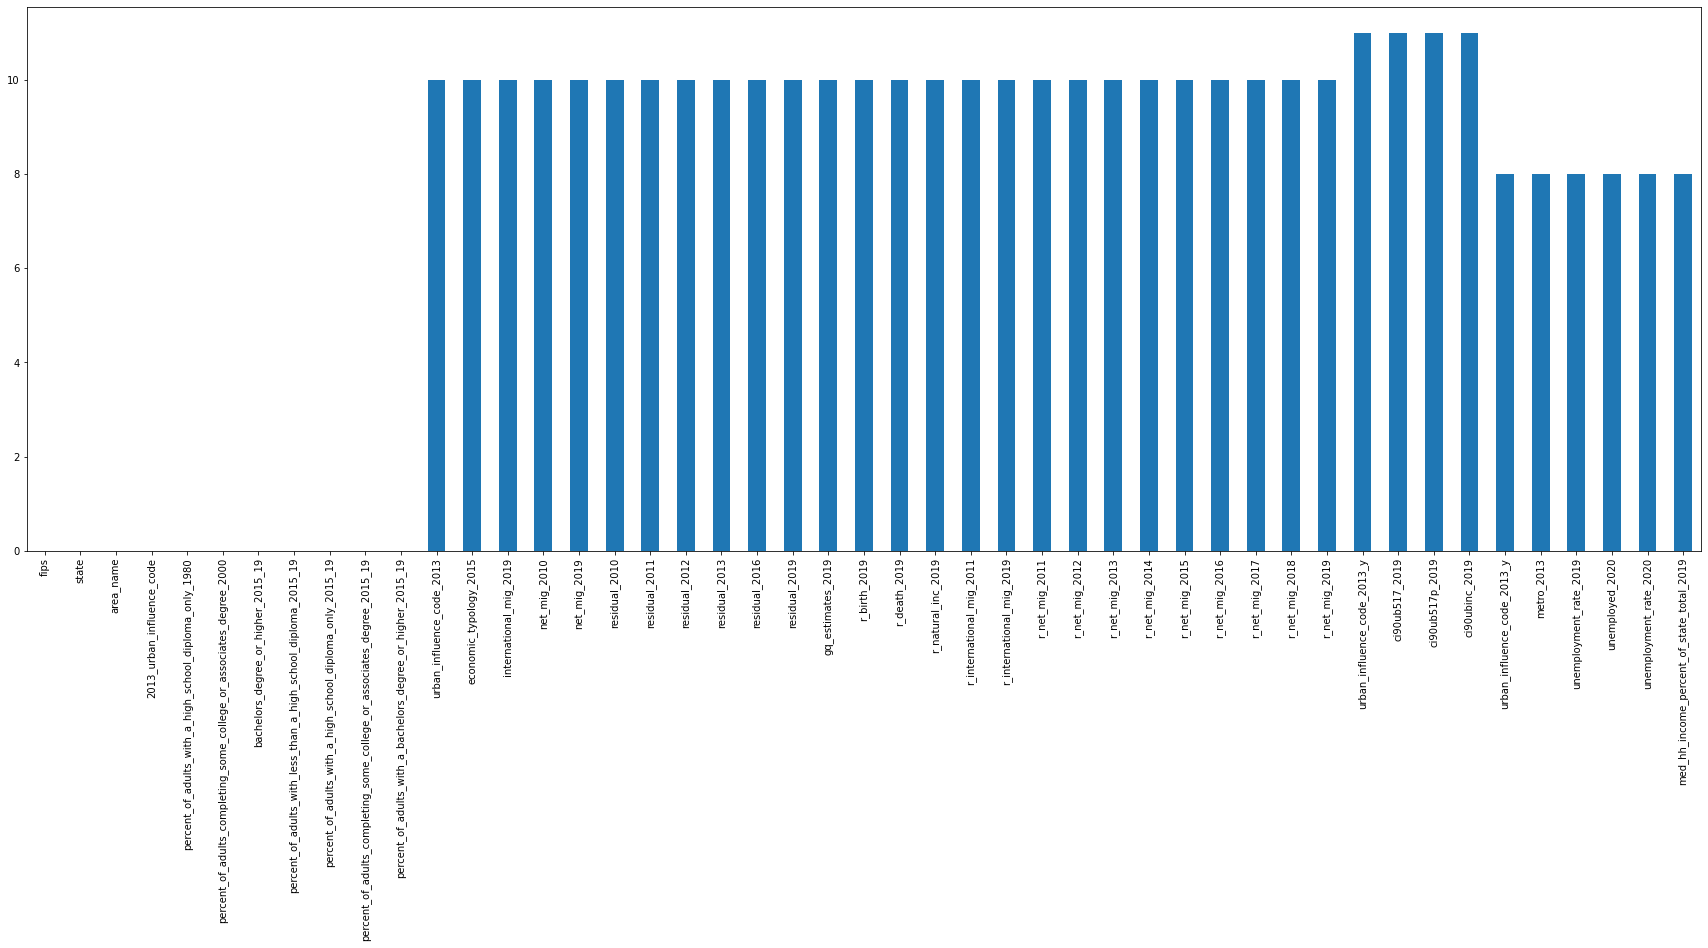

In [85]:
show_na(df)

In [86]:
df

,fips,state,area_name,2013_urban_influence_code,percent_of_adults_with_a_high_school_diploma_only_1980,percent_of_adults_completing_some_college_or_associates_degree_2000,bachelors_degree_or_higher_2015_19,percent_of_adults_with_less_than_a_high_school_diploma_2015_19,percent_of_adults_with_a_high_school_diploma_only_2015_19,percent_of_adults_completing_some_college_or_associates_degree_2015_19,...,urban_influence_code_2013_y,ci90ub517_2019,ci90ub517p_2019,ci90ubinc_2019,urban_influence_code_2013_y,metro_2013,unemployment_rate_2019,unemployed_2020,unemployment_rate_2020,med_hh_income_percent_of_state_total_2019
0,01001,AL,Autauga County,2.0,35.2,26.9,9929.0,11.483395,33.588459,28.356571,...,2.0,1850.0,19.4,63949.0,2.0,1.0,2.7,1262.0,4.9,112.481888
1,01003,AL,Baldwin County,2.0,33.7,29.3,48148.0,9.193843,27.659616,31.284081,...,2.0,5987.0,17.2,65149.0,2.0,1.0,2.8,5425.0,5.6,115.645828
2,01005,AL,Barbour County,6.0,26.1,21.3,2080.0,26.786907,35.604542,26.029837,...,6.0,1822.0,49.0,40122.0,6.0,0.0,3.8,605.0,7.0,69.482918
3,01007,AL,Bibb County,1.0,29.6,20.4,1678.0,20.942602,44.878773,23.800098,...,1.0,1050.0,32.7,53545.0,1.0,1.0,3.1,573.0,6.6,92.557610
4,01009,AL,Blount County,1.0,32.4,24.8,5210.0,19.509438,33.422131,33.975021,...,1.0,2493.0,25.8,59027.0,1.0,1.0,2.7,1008.0,4.1,102.184624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,56037,WY,Sweetwater County,8.0,43.5,35.7,6291.0,7.213361,33.041271,37.246979,...,8.0,872.0,11.1,87841.0,8.0,0.0,4.0,1532.0,7.4,121.899567
3148,56039,WY,Teton County,8.0,27.2,30.0,9875.0,4.814409,14.876176,23.304277,...,8.0,201.0,6.7,111143.0,8.0,0.0,2.8,912.0,6.0,149.408936
3149,56041,WY,Uinta County,8.0,46.8,34.2,2078.0,7.258562,41.522678,35.189754,...,8.0,479.0,11.1,78321.0,8.0,0.0,4.0,582.0,6.3,106.959732
3150,56043,WY,Washakie County,11.0,43.2,33.1,1297.0,10.241615,29.751171,36.620987,...,11.0,226.0,17.4,60194.0,11.0,0.0,4.1,211.0,5.3,83.326279


# Clustering

In [87]:
# ...